In [ ]:
!pip install pot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.0/823.0 kB 4.6 MB/s eta 0:00:00


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from ot import emd2

In [ ]:
def compute_ollivier_ricci_curvature(G, u, v, alpha=0.5, length=None):
    # Set the default edge length to 'weight' if not specified
    if length is None:
        length = 'weight'

    # Get the neighbors of u and v
    neighbors_u = list(G.neighbors(u)) + [u]
    neighbors_v = list(G.neighbors(v)) + [v]

    # Create the source and target distributions
    dist_u = np.array([1.0 / len(neighbors_u)] * len(neighbors_u))
    dist_v = np.array([1.0 / len(neighbors_v)] * len(neighbors_v))

    # Compute the cost matrix based on the shortest path distances
    cost_matrix = np.zeros((len(neighbors_u), len(neighbors_v)))
    for i, x in enumerate(neighbors_u):
        for j, y in enumerate(neighbors_v):
            cost_matrix[i][j] = nx.shortest_path_length(G, x, y, weight=length)

    # Compute the Earth Mover's Distance (Wasserstein distance) using POT library
    emd_distance = emd2(dist_u, dist_v, cost_matrix)

    # Compute the Ollivier-Ricci curvature
    curvature = 1.0 - emd_distance / G[u][v].get(length, 1.0)

    return curvature


def compute_balanced_forman_curvature(G, i, j):
    # Get the degrees of nodes i and j
    d_i = G.degree(i)
    d_j = G.degree(j)

    if min(d_i, d_j) == 1:
        return 0

    # Compute the number of triangles and 4-cycles
    triangles = len(list(nx.common_neighbors(G, i, j)))
    four_cycles_i = []
    four_cycles_j = []

    for k in G.neighbors(i):
        if k != j and not G.has_edge(k, j):
            for l in nx.common_neighbors(G, k, j):
                if not G.has_edge(l, i):
                    four_cycles_i.append((k, l))

    for k in G.neighbors(j):
        if k != i and not G.has_edge(k, i):
            for l in nx.common_neighbors(G, k, i):
                if not G.has_edge(l, j):
                    four_cycles_j.append((k, l))

    # Compute gamma_max
    gamma_max = 1
    for k, l in four_cycles_i:
        gamma_max = max(gamma_max, len(list(nx.common_neighbors(G, k, l))))
    for k, l in four_cycles_j:
        gamma_max = max(gamma_max, len(list(nx.common_neighbors(G, k, l))))

    # Compute the Balanced Forman curvature
    curvature = (2 / d_i) + (2 / d_j) - 2
    curvature += (2 * triangles) / max(d_i, d_j)
    curvature += triangles / min(d_i, d_j)
    curvature += (1 / gamma_max) * (len(four_cycles_i) + len(four_cycles_j)) / max(d_i, d_j)

    return curvature

<ipython-input-5-13e95abdeaac>:27: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.coolwarm), label='Ollivier-Ricci Curvature')


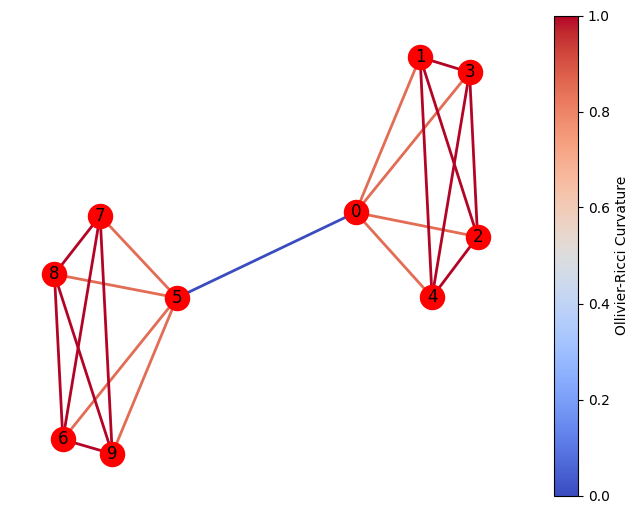

In [ ]:
# Create the graph
G = nx.Graph()

# Create two complete graphs of 5 nodes each
nodes1 = range(5)
nodes2 = range(5, 10)
G.add_nodes_from(nodes1)
G.add_nodes_from(nodes2)
G.add_edges_from([(u, v) for u in nodes1 for v in nodes1 if u != v])
G.add_edges_from([(u, v) for u in nodes2 for v in nodes2 if u != v])

# Connect the two complete graphs with a single edge
G.add_edge(0, 5)  # This edge should have a highly negative curvature

# Compute Ollivier-Ricci curvature for each edge
edge_curvatures = {}
for u, v in G.edges():
    edge_curvatures[(u, v)] = compute_ollivier_ricci_curvature(G, u, v)

# Color-code the edges based on curvature
edge_colors = [edge_curvatures[(u, v)] for u, v in G.edges()]
node_colors = 'r'

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color=node_colors, edge_color=edge_colors, edge_cmap=plt.cm.coolwarm, width=2, with_labels=True)
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.coolwarm), label='Ollivier-Ricci Curvature')
plt.show()

<ipython-input-22-1a98d1e9e333>:27: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.coolwarm), label='Balanced Forman Curvature')


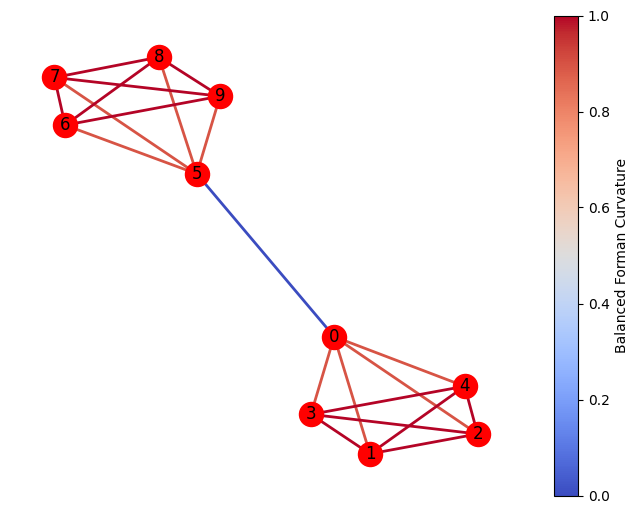

In [ ]:
# Create the graph
G = nx.Graph()

# Create two complete graphs of 5 nodes each
nodes1 = range(5)
nodes2 = range(5, 10)
G.add_nodes_from(nodes1)
G.add_nodes_from(nodes2)
G.add_edges_from([(u, v) for u in nodes1 for v in nodes1 if u != v])
G.add_edges_from([(u, v) for u in nodes2 for v in nodes2 if u != v])

# Connect the two complete graphs with a single edge
G.add_edge(0, 5)  # This edge should have a highly negative curvature

# Compute Ollivier-Ricci curvature for each edge
edge_curvatures = {}
for u, v in G.edges():
    edge_curvatures[(u, v)] = compute_balanced_forman_curvature(G, u, v)

# Color-code the edges based on curvature
edge_colors = [edge_curvatures[(u, v)] for u, v in G.edges()]
node_colors = 'r'

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color=node_colors, edge_color=edge_colors, edge_cmap=plt.cm.coolwarm, width=2, with_labels=True)
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.coolwarm), label='Balanced Forman Curvature')
plt.show()

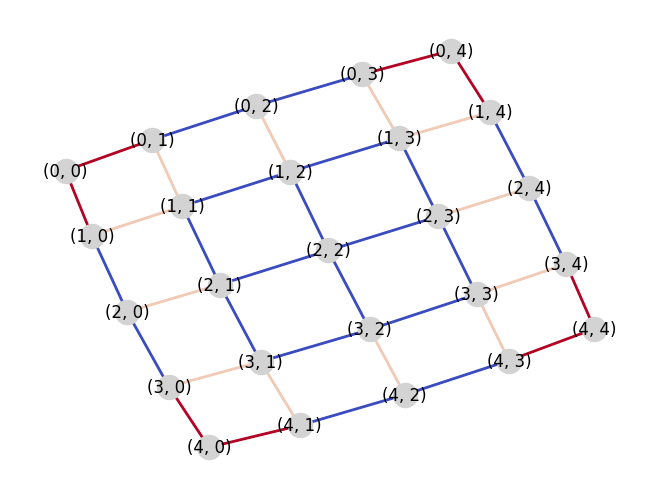

In [ ]:

# Create a 5x5 grid graph
G = nx.grid_2d_graph(5, 5)

# Compute Ricci curvature
ricci_curvature = {(u, v): compute_ricci_curvature(G, u, v) for u, v in G.edges()}

# Compute Forman curvature
forman_curvature = {(u, v): compute_balanced_forman_curvature(G, u, v) for u, v in G.edges()}

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color='lightgray', with_labels=True)

# Color the edges based on Ricci curvature
edge_colors = [ricci_curvature[u, v] for u, v in G.edges()]
cmap = plt.get_cmap('coolwarm')
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, edge_cmap=cmap, width=2)

#

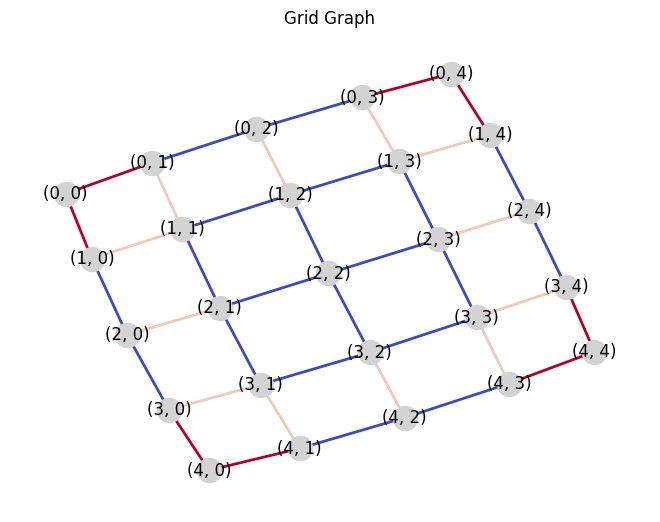

In [ ]:

nx.draw(G, pos, node_color='lightgray', with_labels=True)

# Color the edges based on Ricci curvature
edge_colors = [ricci_curvature[u, v] for u, v in G.edges()]
cmap = plt.get_cmap('coolwarm')
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, edge_cmap=cmap, width=2)

plt.title('Grid Graph')
plt.axis('off')
plt.show()

<ipython-input-21-63f05752dc5f>:4: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Ricci Curvature')


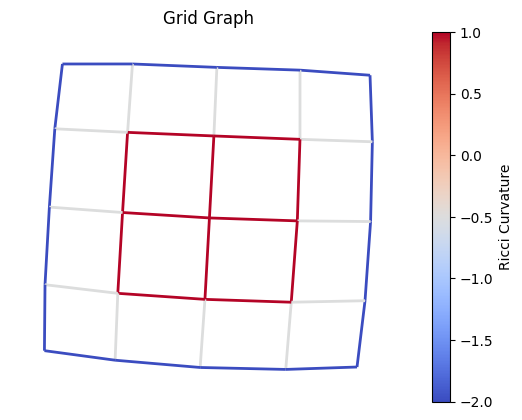

In [ ]:
# Add a colorbar for Ricci curvature
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_clim(vmin=-2, vmax=1)  # Adjust the range as needed
plt.colorbar(sm, label='Ricci Curvature')

# Optionally, you can also visualize Forman curvature
edge_colors = [forman_curvature[u, v] for u, v in G.edges()]
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, edge_cmap=cmap, width=2)

plt.title('Grid Graph')
plt.axis('off')
plt.show()

In [ ]:
import networkx as nx
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
from ot import emd2

def compute_ollivier_ricci_curvature(G, u, v, alpha=0.5, length=None):
    # Set the default edge length to 'weight' if not specified
    if length is None:
        length = 'weight'

    # Get the neighbors of u and v
    neighbors_u = list(G.neighbors(u)) + [u]
    neighbors_v = list(G.neighbors(v)) + [v]

    # Create the source and target distributions
    dist_u = np.array([1.0 / len(neighbors_u)] * len(neighbors_u))
    dist_v = np.array([1.0 / len(neighbors_v)] * len(neighbors_v))

    # Compute the cost matrix based on the shortest path distances
    cost_matrix = np.zeros((len(neighbors_u), len(neighbors_v)))
    for i, x in enumerate(neighbors_u):
        for j, y in enumerate(neighbors_v):
            cost_matrix[i][j] = nx.shortest_path_length(G, x, y, weight=length)

    # Compute the Earth Mover's Distance (Wasserstein distance) using POT library
    emd_distance = emd2(dist_u, dist_v, cost_matrix)

    # Compute the Ollivier-Ricci curvature
    curvature = 1.0 - emd_distance / G[u][v].get(length, 1.0)

    return curvature

def color_nodes_with_spectral_smoothing(G):
    # Compute the Laplacian matrix
    L = nx.laplacian_matrix(G).toarray()

    # Compute the eigenvalues and eigenvectors of the Laplacian matrix
    eigenvalues, eigenvectors = linalg.eigh(L)

    # Sort the eigenvalues and eigenvectors in ascending order
    sorted_indices = np.argsort(eigenvalues)
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Select the eigenvector corresponding to the smallest nonzero eigenvalue
    smoothest_eigenvector = eigenvectors[:, 1]

    # Normalize the eigenvector values to the range [0, 1]
    min_value = np.min(smoothest_eigenvector)
    max_value = np.max(smoothest_eigenvector)
    normalized_eigenvector = (smoothest_eigenvector - min_value) / (max_value - min_value)

    # Map the normalized eigenvector values to colors
    colors = plt.cm.viridis(normalized_eigenvector)

    # Set the node colors based on the eigenvector values
    node_colors = {node: colors[i] for i, node in enumerate(G.nodes())}

    return node_colors

# Create the graph
G = nx.Graph()

# Create two complete graphs of 5 nodes each
nodes1 = range(5)
nodes2 = range(5, 10)
G.add_nodes_from(nodes1)
G.add_nodes_from(nodes2)
G.add_edges_from([(u, v) for u in nodes1 for v in nodes1 if u != v])
G.add_edges_from([(u, v) for u in nodes2 for v in nodes2 if u != v])

# Connect the two complete graphs with a single edge
G.add_edge(0, 5)  # This edge should have a highly negative curvature

# Compute Ollivier-Ricci curvature for each edge
edge_curvatures = {}
for u, v in G.edges():
    edge_curvatures[(u, v)] = compute_ollivier_ricci_curvature(G, u, v)

# Color-code the edges based on curvature
edge_colors = [edge_curvatures[(u, v)] for u, v in G.edges()]

# Color the nodes based on the spectral smoothing
node_colors = color_nodes_with_spectral_smoothing(G)

# Create a subplot with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Draw the graph with curvature-based edge coloring
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color='r', edge_color=edge_colors, edge_cmap=plt.cm.coolwarm, width=2, with_labels=True, ax=ax1)
ax1.set_title("Ollivier-Ricci Curvature Edge Coloring")
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.coolwarm), label='Ollivier-Ricci Curvature', ax=ax1)

# Draw the graph with spectral smoothing node coloring
nx.draw(G, pos, node_color=list(node_colors.values()), cmap=plt.cm.viridis, edge_color='gray', width=2, with_labels=True, ax=ax2)
ax2.set_title("Spectral Smoothing Node Coloring")
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis), label='Eigenvector Value', ax=ax2)

plt.tight_layout()
plt.savefig("intuition_motivation_curvature_spectral.png", dpi=300)
plt.close()

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(
